In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Importing the data

In [2]:
df_bitcoin_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_bitcoin_daily = pd.read_csv('data/Daily Bitcoin Price.csv')
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')
df_unemploymment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')

### Data exploration

#### Tesla


In [3]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [4]:
df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007
123,2020-09-01,31,407.339996


In [5]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [6]:
df_tesla.shape

(124, 3)

#### Bitcoin daily

In [7]:
df_bitcoin_daily.tail()

,DATE,CLOSE,VOLUME
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10
2203,2020-09-28,10912.536133,2.122653e+10


In [8]:
df_bitcoin_daily.shape

(2204, 3)

In [9]:
df_bitcoin_daily.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


#### Bitcoin search

In [10]:
df_bitcoin_search.tail()

,MONTH,BTC_NEWS_SEARCH
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16
72,2020-09,13


In [11]:
df_bitcoin_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [12]:
df_bitcoin_search.shape

(73, 2)

#### UE Unemployment

In [13]:
df_unemploymment.shape

(200, 3)

In [14]:
df_unemploymment.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2
199,2020-08,50,8.4


In [15]:
df_unemploymment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200.000000,200.000000
mean,10.315000,6.173000
std,10.778061,2.128267
min,4.000000,3.500000
25%,5.000000,4.600000
50%,7.000000,5.400000
75%,12.000000,7.825000
max,100.000000,14.700000


### Cleaning data

In [16]:
print(f'Number of NaN values in tesla dataset is:\n{df_tesla.isna().sum()}')

Number of NaN values in tesla dataset is:
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64


In [17]:
print(f'Number of NaN values in bitcoin daily dataset is:\n{df_bitcoin_daily.isna().sum()}')

Number of NaN values in bitcoin daily dataset is:
DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [18]:
df_bitcoin_daily[df_bitcoin_daily['VOLUME'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [19]:
df_bitcoin_daily = df_bitcoin_daily.dropna()
print(f'Shape after cleaning {df_bitcoin_daily.shape}')
df_bitcoin_daily.isna().sum()

Shape after cleaning (2203, 3)


DATE      0
CLOSE     0
VOLUME    0
dtype: int64

In [20]:
print(f'Number of NaN values in bitcoin search dataset is:\n{df_bitcoin_search.isna().sum()}')

Number of NaN values in bitcoin search dataset is:
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64


In [21]:
print(f'Number of NaN values in unemployment datset is:\n{df_unemploymment.isna().sum()}')

Number of NaN values in unemployment datset is:
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64


### Converting datetime

In [22]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [23]:
type(df_tesla['MONTH'][0])

str

In [24]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_tesla['MONTH'].head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

#### Automating datetime conversion

In [25]:
df = [df_bitcoin_daily, df_bitcoin_search, df_tesla, df_unemploymment]
date_name = [dataf.columns[0] for dataf in df]
for i in range(len(date_name)):
    df[i][date_name[i]] = pd.to_datetime(df[i][date_name[i]])
    print(type(df[i][date_name[i]][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Now when data time is converted to actuall datetime type we can perform operations like .resample() by month day or year

In [26]:
df_bitcoin_monthly = df_bitcoin_daily.resample('M', on='DATE').mean()
df_bitcoin_monthly.head()
# Now our data is resampled on the month with average values

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


### Ploting tesla data

In [27]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


(14761.0, 18506.0)

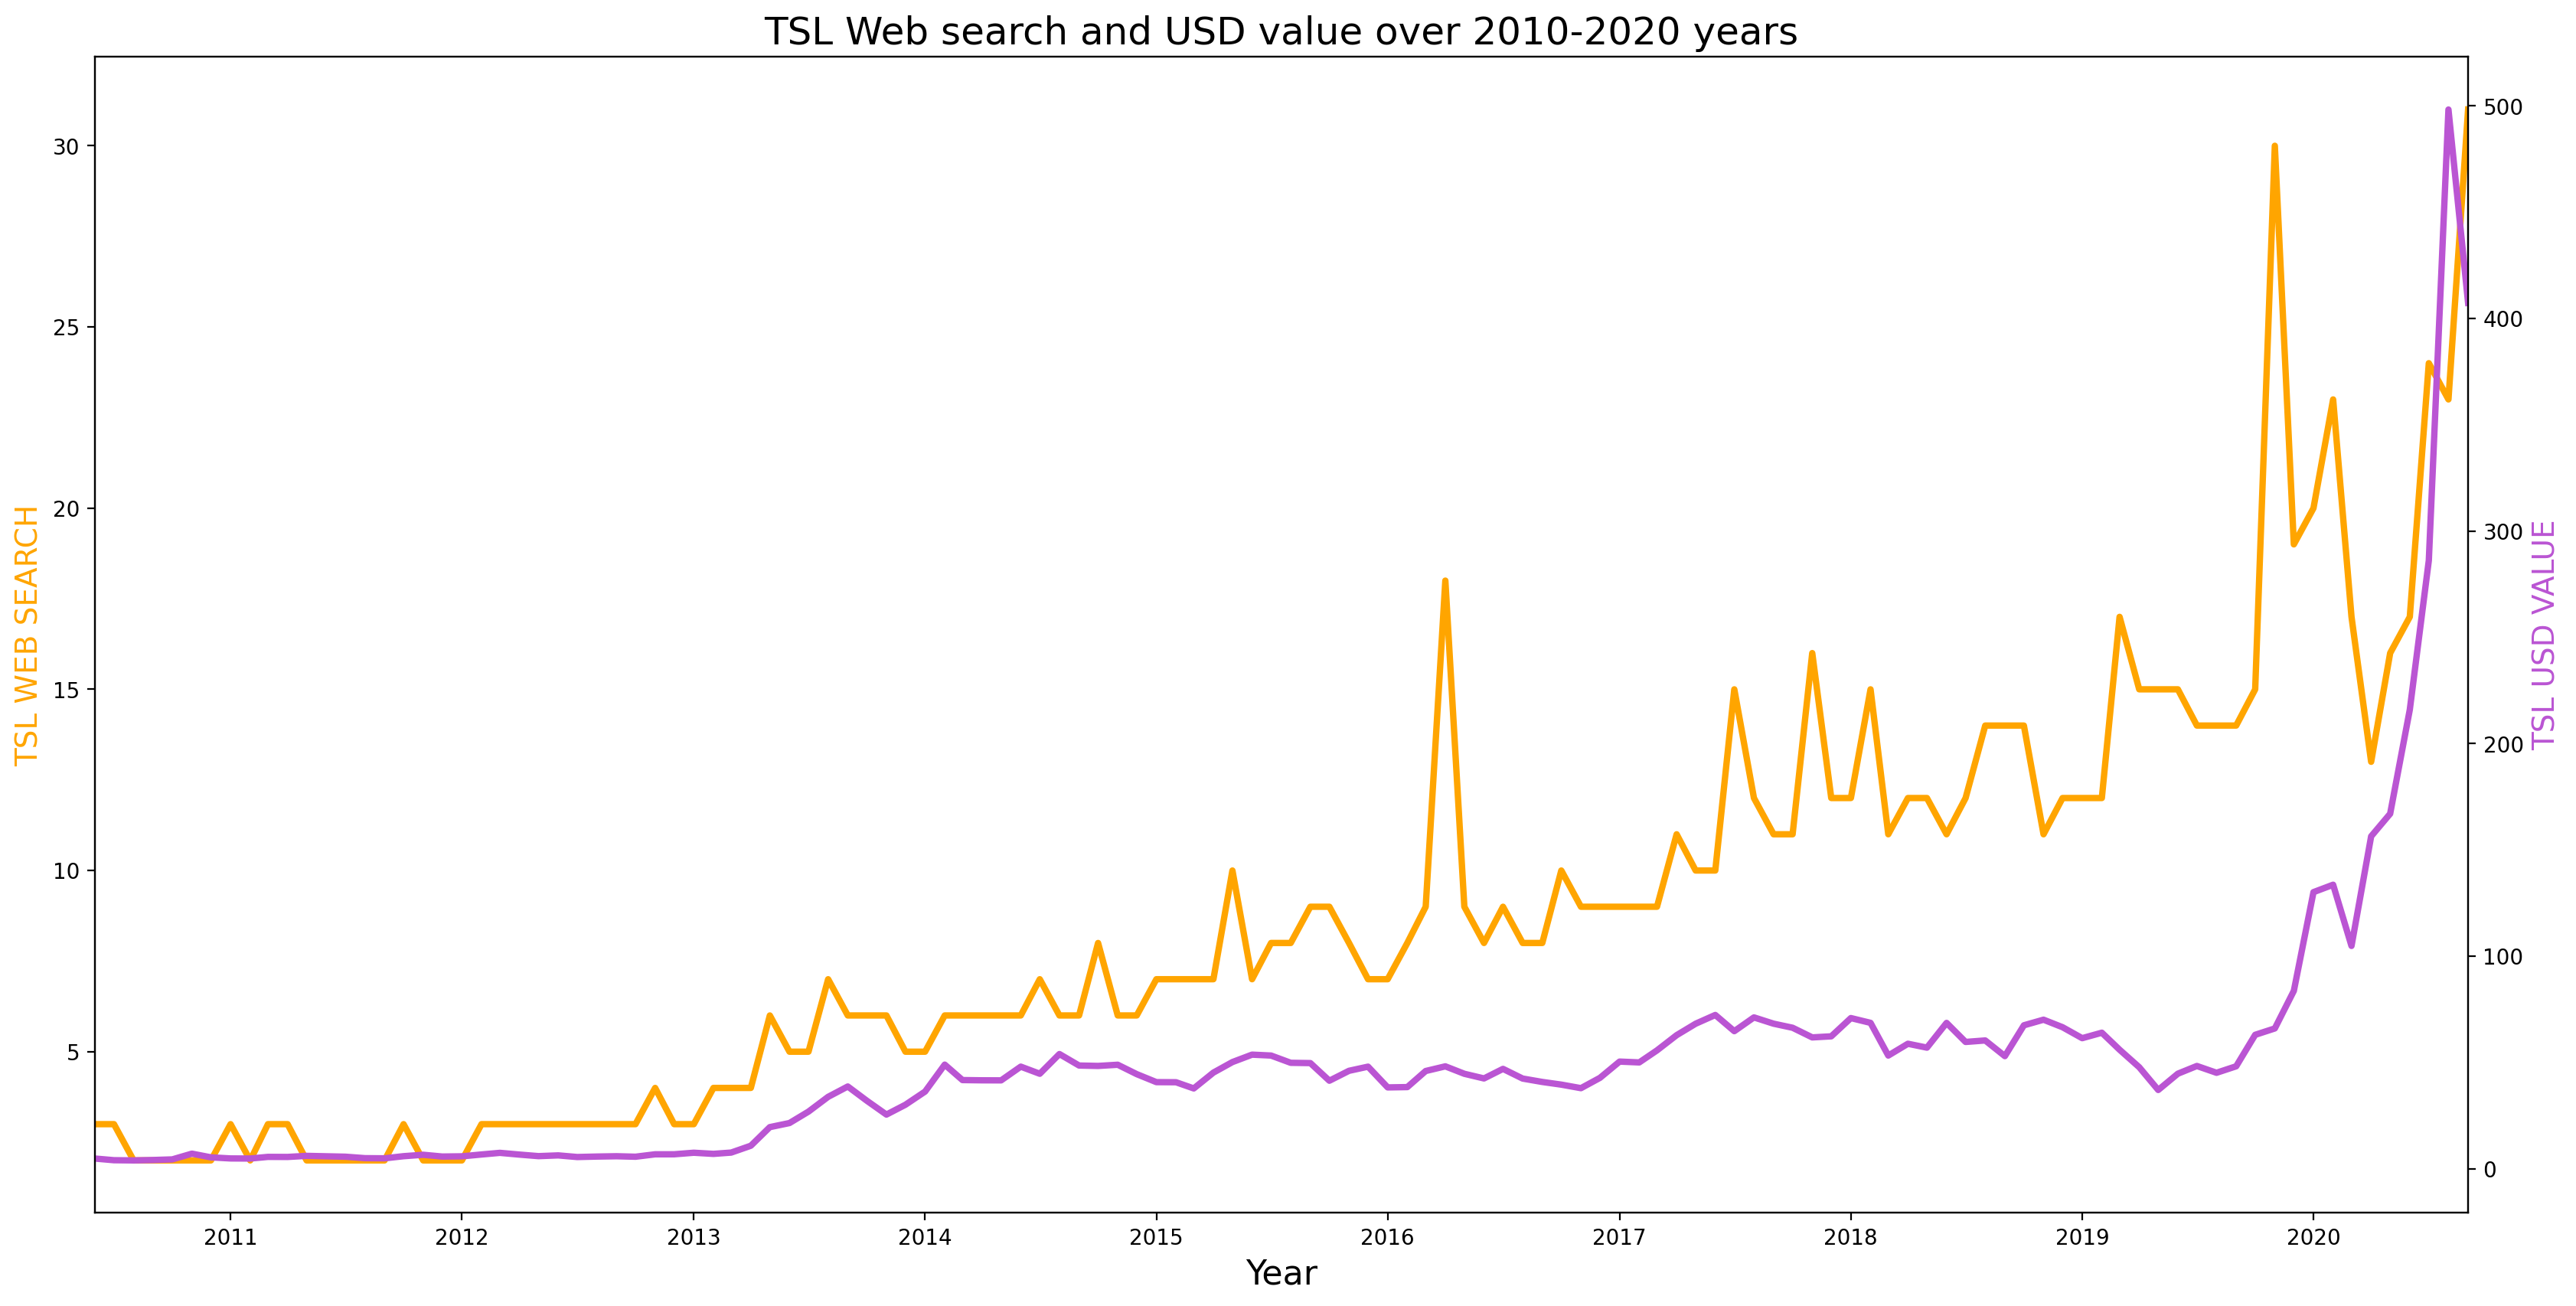

In [28]:
plt.figure(figsize=(20,10), dpi=200)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.title('TSL Web search and USD value over 2010-2020 years', fontsize=18)
ax1.plot(df_tesla['MONTH'],df_tesla['TSLA_WEB_SEARCH'], 'orange', linewidth=3)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('TSL WEB SEARCH', fontsize=14, color='orange')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'],'mediumorchid', linewidth=3)
ax2.set_ylabel('TSL USD VALUE', fontsize=14, color='mediumorchid')
ax1.set_xlim((df_tesla['MONTH'].iloc[0], df_tesla['MONTH'].iloc[-1]))


### Ploting bitcoin data

(16343.0, 18535.0)

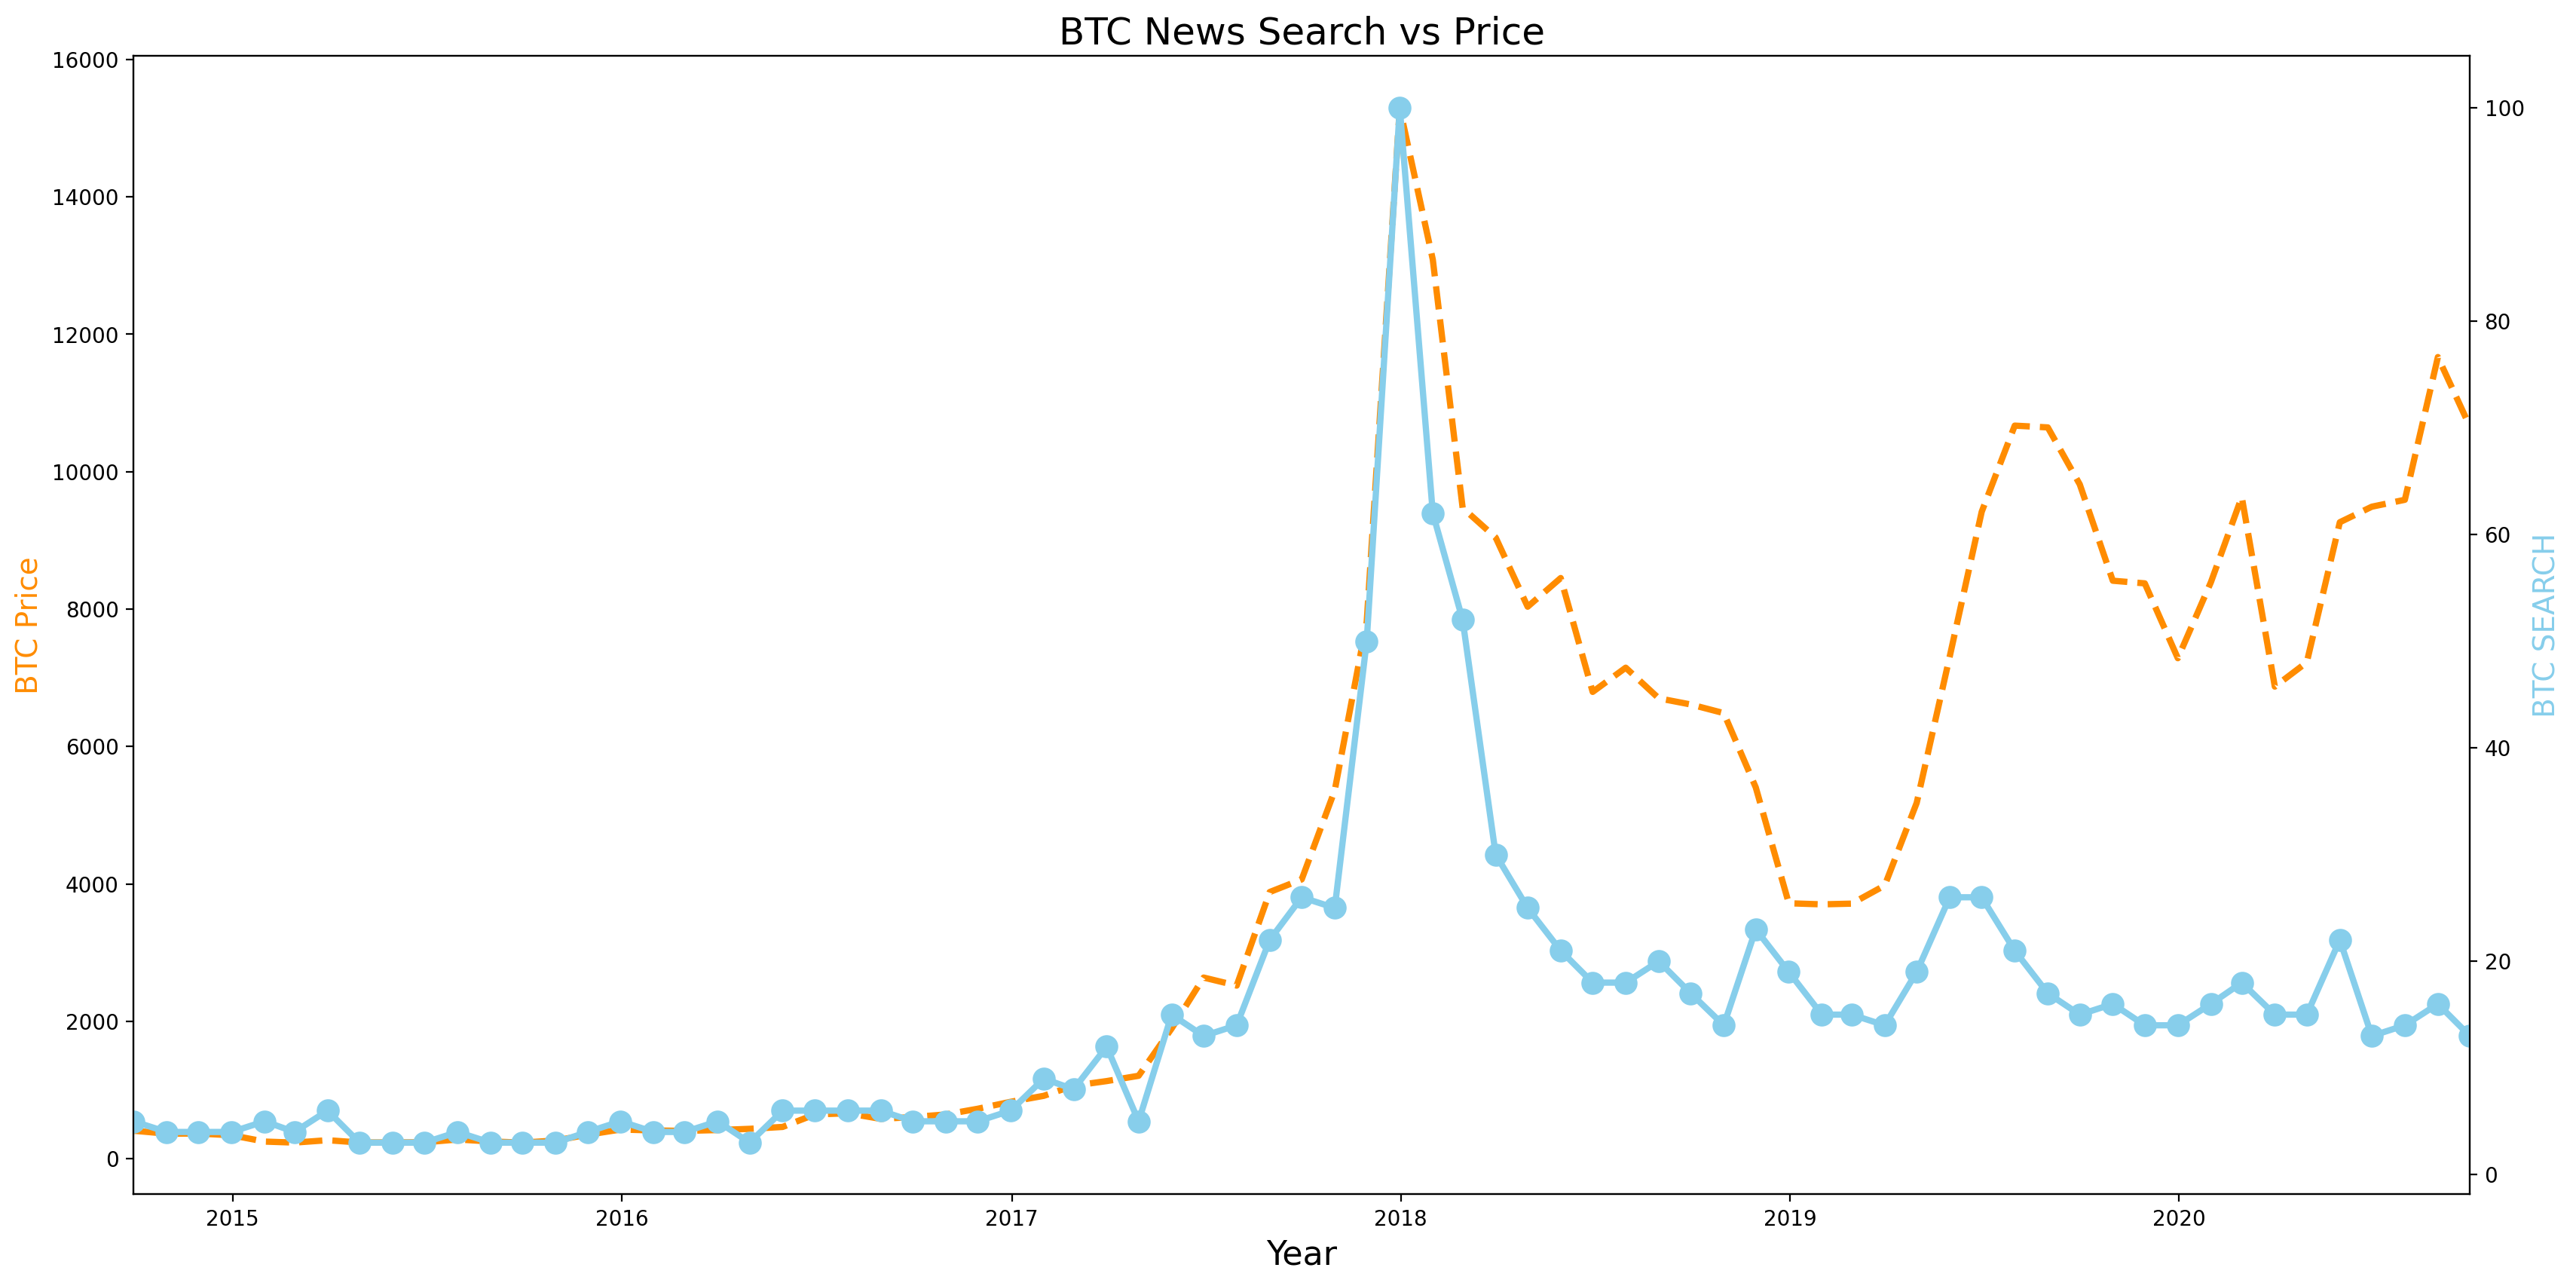

In [29]:
plt.figure(figsize=(20,10), dpi=200)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.title('BTC News Search vs Price', fontsize=18)
ax1.plot(df_bitcoin_monthly.index, df_bitcoin_monthly['CLOSE'],\
         'darkorange', linewidth=3, linestyle='--')
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('BTC Price', fontsize=14, color='darkorange')
ax2.plot(df_bitcoin_monthly.index, df_bitcoin_search['BTC_NEWS_SEARCH'],\
         linewidth=3, color='skyblue', marker='o', markersize=10)
ax2.set_ylabel('BTC SEARCH', fontsize=14, color='skyblue')
ax1.set_xlim((df_bitcoin_monthly.index[0],df_bitcoin_monthly.index[-1]))



In [30]:
df_bitcoin_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5
...,...,...
68,2020-05-01,22
69,2020-06-01,13
70,2020-07-01,14
71,2020-08-01,16


In [33]:
df_unemploymment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


In [35]:
type(df_unemploymment['MONTH'][0])

pandas._libs.tslibs.timestamps.Timestamp

Text(0.5, 0, 'Year')

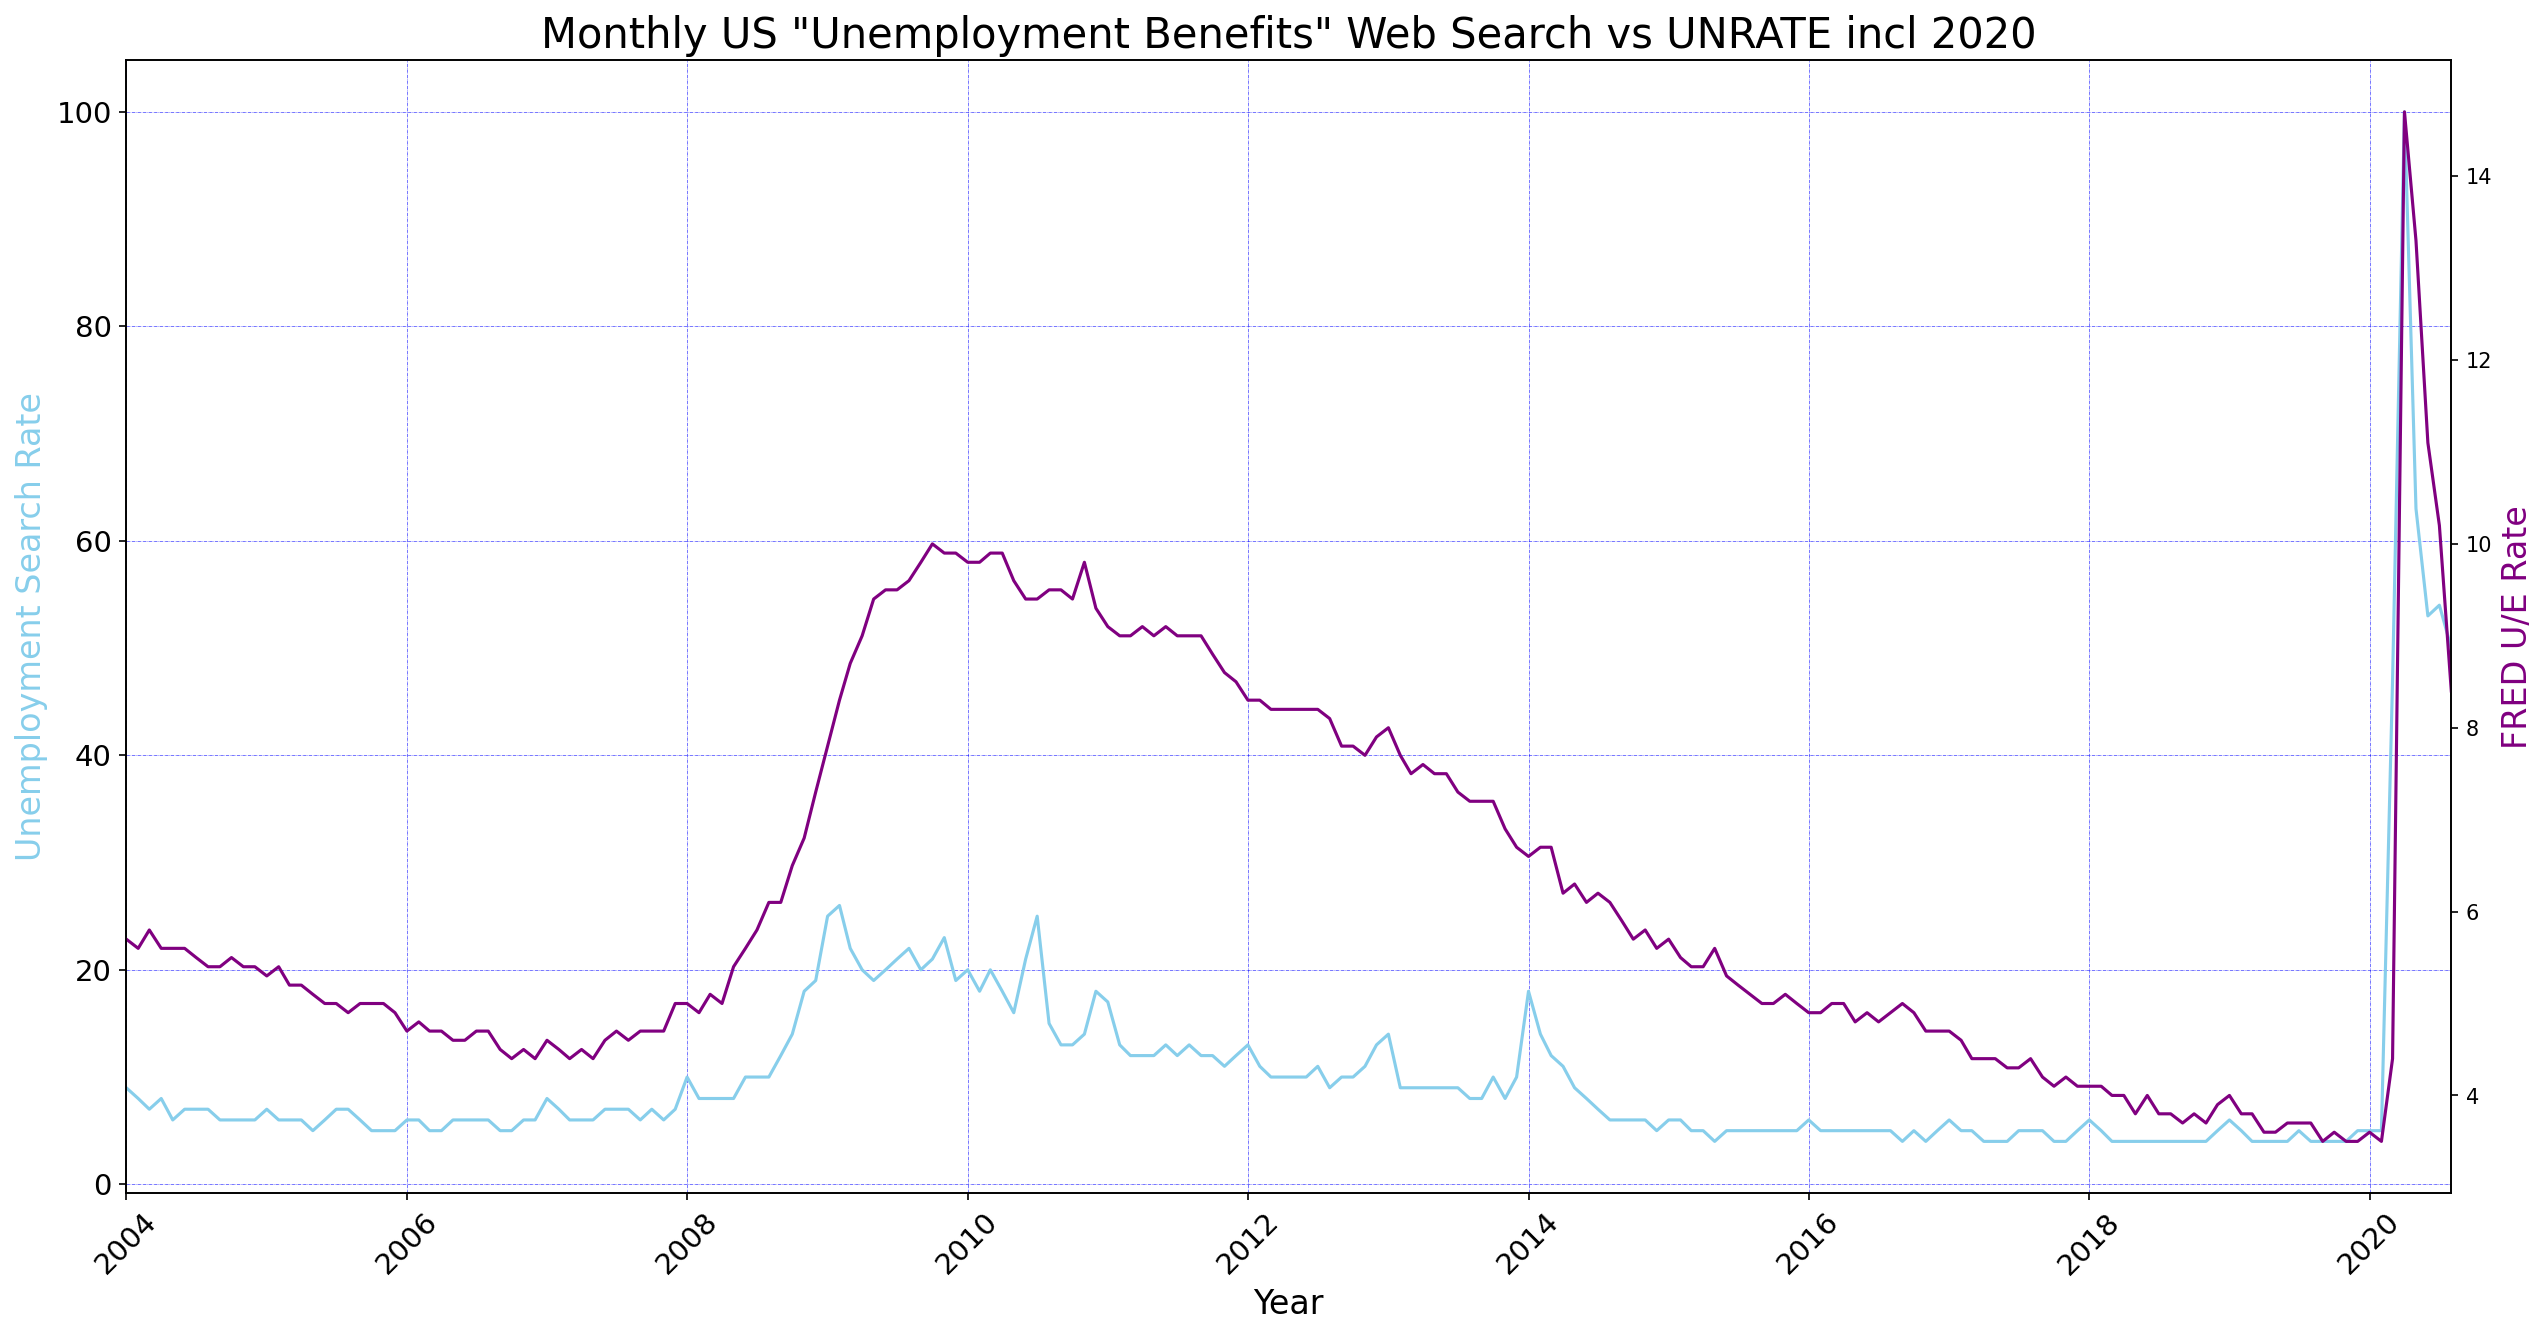

In [49]:
plt.figure(figsize=(20,10), dpi=150)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020',fontsize=20)

axis1 = plt.gca()
axis2 = axis1.twinx()

axis1.plot(df_unemploymment['MONTH'], df_unemploymment['UE_BENEFITS_WEB_SEARCH'], 'skyblue')
axis1.set_ylabel('Unemployment Search Rate', color='skyblue',fontsize=16)
axis1.set_ylim((0,1001))
axis2.plot(df_unemploymment['MONTH'], df_unemploymment['UNRATE'], 'purple')
axis2.set_ylabel('FRED U/E Rate', color='purple',fontsize=16)
axis1.set_xlim((df_unemploymment['MONTH'].iloc[0], df_unemploymment['MONTH'].iloc[-1]))
axis1.set_xlabel('Year', fontsize=16)